In [2]:
from events import get_interpolators
import numpy as np
import pandas as pd
from gaussian import gaussian
from scipy import interpolate
from scipy.stats import norm, skewnorm
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import curve_fit

matplotlib.rc("text", usetex=False)
interp_flux, interp_aeff, interp_reco_to_true, interp_true_to_reco = get_interpolators()

In [3]:
file1 = "data/energy_resolution_distributions.csv"
df = pd.read_csv(
    file1,
    skiprows=2,
    header=None,
    names=[
        "Ereco_1001",
        "dist_1001",
        "Ereco_3167",
        "dist_3167",
        "Ereco_10016",
        "dist_10016",
    ],
    dtype=np.float64,
    skipinitialspace=True,
    sep=",",
).fillna(0)
display(df)

,Ereco_1001,dist_1001,Ereco_3167,dist_3167,Ereco_10016,dist_10016
0,104.961564,0.013187,108.963544,0.005925,257.663331,0.004146
1,112.064851,0.015226,124.210834,0.006794,316.543014,0.005051
2,126.031552,0.017323,141.591680,0.007848,388.877530,0.006040
3,139.546172,0.019872,161.404630,0.008901,477.741497,0.006902
4,156.937884,0.021927,183.990011,0.010138,586.912126,0.008392
5,177.232480,0.023883,209.735768,0.011242,721.029774,0.010765
6,198.287851,0.025722,239.084134,0.012396,885.795184,0.012542
7,223.929664,0.027223,272.539222,0.013733,1088.211801,0.014553
8,250.532700,0.028584,310.675688,0.015188,1324.435506,0.017479
9,280.296200,0.030134,351.672553,0.016674,1567.328393,0.020361


In [110]:
E = df.iloc[:, 0]
p = df.iloc[:, 1]
logE = np.log10(E)
mu, sigma = norm.fit([logE, p], floc=np.log10(741))
print(mu, sigma)
x = np.linspace(1, 5)
# plt.plot(E,p)
plt.plot(x, norm.pdf(x, loc=mu, scale=sigma))

RuntimeError: The data contains non-finite values.

In [85]:
from scipy.integrate import simps

logE = np.log10(E)
mu = simps(logE * p, logE)
var = simps((logE - mu) ** 2 * p, logE)
print(mu, np.sqrt(var))
print(np.sqrt(np.log10(1 + var / mu**2)))

0.13203893928944685 0.5925967428047056
1.1511548035011518


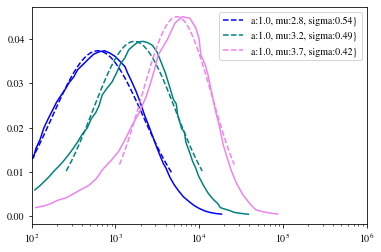

In [6]:
def f(x, a, mu, sigma):
    # pdf= skewnorm.pdf(np.log10(x),a=a,loc=mu,scale=sigma)
    pdf = norm.pdf(np.log10(x), loc=mu, scale=sigma)
    normalization = pdf.max() / p.max()
    return pdf / normalization


sorted_df = np.array(
    [
        df.iloc[:, 0:2].sort_values("Ereco_1001")[9:],
        df.iloc[:, 2:4].sort_values("Ereco_3167"),
        df.iloc[:, 4:6].sort_values("Ereco_10016")[11:],
    ]
)
colors = ["blue", "teal", "violet"]
a_list = []
mu_list = []
sigma_list = []
for i, Et in enumerate([1001, 3167, 10016]):
    # mu = np.log10(interp_true_to_reco(Et)) #Fig 4.14 in weaver 2015
    df1 = sorted_df[i]
    E = df1.iloc[:, 0]
    p = df1.iloc[:, 1]
    mu = np.log10(E[p.argmax()])
    params, _ = curve_fit(f, E, p, p0=(1, mu, 0.4))
    # intervals = skewnorm.interval(0.999,a=params[0], loc=params[1], scale=params[2])
    intervals = norm.interval(0.9, loc=params[1], scale=params[2])
    Er = np.logspace(intervals[0], intervals[1], 43)
    y = f(Er, params[0], params[1], params[2])
    plt.plot(
        Er,
        y,
        c=colors[i],
        linestyle="--",
        label=f"a:{np.round(params[0],1)}, mu:{np.round(params[1],1)}, sigma:{np.round(params[2],2)}}}",
    )
    plt.plot(E, p, c=colors[i])
    a_list.append(params[0])
    mu_list.append(params[1])
    sigma_list.append(params[2])
plt.xlim((1e2, 1e6))
# plt.ylim((0,0.07))
plt.xscale("log")
plt.legend()

In [181]:
interp_a = interpolate.interp1d(
    [1001, 3167, 10016], a_list, fill_value="extrapolate", kind="linear"
)
interp_mu = interpolate.interp1d(
    [1001, 3167, 10016], mu_list, fill_value="extrapolate", kind="linear"
)
interp_sigma = interpolate.interp1d(
    [1001, 3167, 10016], sigma_list, fill_value="extrapolate", kind="linear"
)
print(interp_a([1e3, 5000]), interp_mu([1e3, 5000]), interp_sigma([1e3, 5000]))

[-1.936 -2.691] [3.291 3.844] [0.83  0.778]


(100.0, 10000000.0)

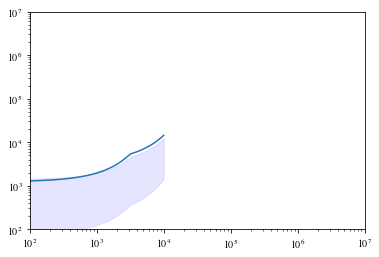

In [186]:
fig = plt.figure()
E_range = np.logspace(2, 4)

intervals = skewnorm.interval(
    0.7, a=interp_a(E_range), loc=interp_mu(E_range), scale=interp_sigma(E_range)
)
plt.plot(E_range, 10 ** interp_mu(E_range))
plt.fill_between(E_range, 10 ** intervals[0], 10 ** intervals[1], color="b", alpha=0.1)
plt.xscale("log")
plt.yscale("log")
plt.xlim((1e2, 1e7))
plt.ylim((1e2, 1e7))